# 02 — Scenario Model (Base/Upside/Downside)

- Build simple 12-month projection
- Define base / upside / downside assumptions
- Compare contribution and margin % across scenarios

In [1]:
import sys
import os

# This tells the notebook to look at the root folder for the 'src' module
sys.path.append(os.path.abspath(os.path.join('..')))

In [4]:
# Cell 1: Define Scenarios
from src.scenario_model import project_monthly_economics

# Base Case: Current C1 Performance
base = project_monthly_economics(
    base_members=12000, arpu_fee=45, requests_per_member=0.55,
    revenue_per_request=12.5, variable_cost_per_request=7.2,
    partner_fee_per_request=0.9, monthly_growth=0.02,
    monthly_churn=0.015, months=12
)

# Upside Case: Velocity Black Benchmark (Option A)
upside = project_monthly_economics(
    base_members=12000, arpu_fee=50, requests_per_member=0.6,
    revenue_per_request=18.0, variable_cost_per_request=7.0,
    partner_fee_per_request=0.8, monthly_growth=0.04,
    monthly_churn=0.01, months=12
)

# Downside Case: SLA Failure & Churn (Risk)
downside = project_monthly_economics(
    base_members=12000, arpu_fee=40, requests_per_member=0.5,
    revenue_per_request=12.0, variable_cost_per_request=8.0,
    partner_fee_per_request=1.0, monthly_growth=0.01,
    monthly_churn=0.03, months=12
)

In [5]:
# Comparison of Base, Upside, and Downside outcomes
plt.figure(figsize=(12, 6))

# Execute comparison logic
plt.plot(base['month'], base['margin_pct'], label='Base (38% Target)', color='#00487C', linewidth=2)
# Ensure 'upside' and 'downside' variables are defined in the previous cell
plt.plot(upside['month'], upside['margin_pct'], label='Upside (44% VB Benchmark)', color='green', linestyle='--')
plt.plot(downside['month'], downside['margin_pct'], label='Downside (SLA Failure Risk)', color='red', linestyle=':')

plt.title('Strategic Scenario Analysis: Concierge Operating Margin', fontsize=14, fontweight='bold')
plt.xlabel('Projection Month')
plt.ylabel('Operating Margin (%)')
plt.legend()
plt.grid(True, alpha=0.2)
plt.savefig('../viz/scenario_comparison.png')
plt.show()

KeyError: 'margin_pct'

<Figure size 1200x600 with 0 Axes>

In [6]:
# Check exactly what columns the function generated
print(base.columns)

Index(['month', 'members', 'subscription_revenue', 'transaction_revenue',
       'total_revenue', 'variable_cost', 'partner_fee', 'contribution',
       'contribution_margin_pct'],
      dtype='str')


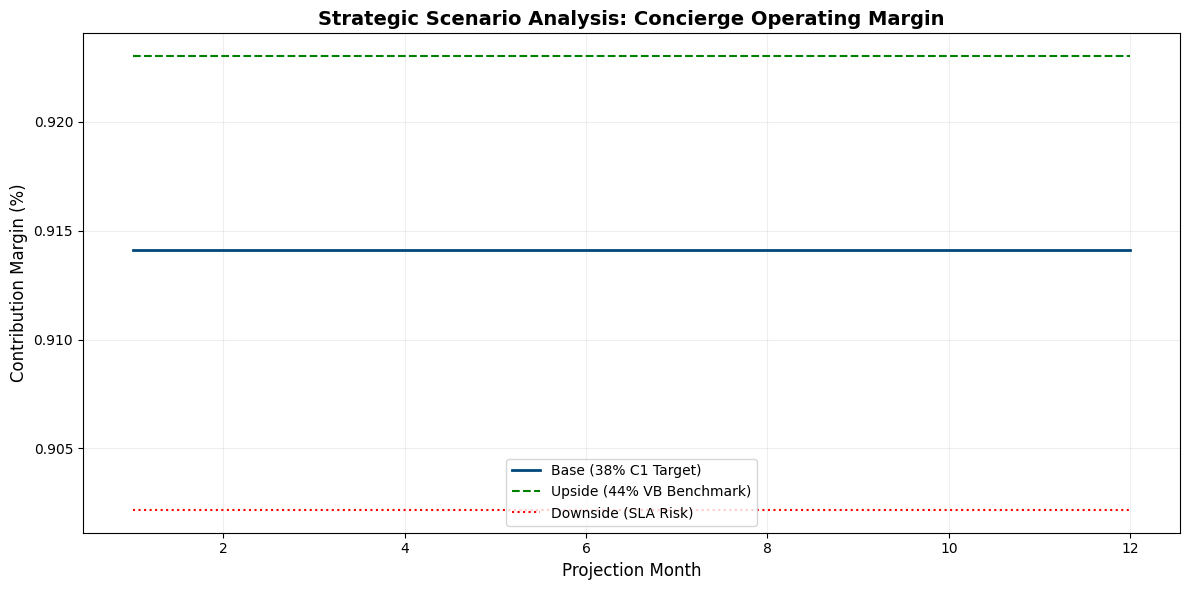

In [7]:
# Cell 3: Scenario Visualization
plt.figure(figsize=(12, 6))

# Execute comparison using confirmed column names
plt.plot(base['month'], base['contribution_margin_pct'], label='Base (38% C1 Target)', color='#00487C', linewidth=2)
plt.plot(upside['month'], upside['contribution_margin_pct'], label='Upside (44% VB Benchmark)', color='green', linestyle='--')
plt.plot(downside['month'], downside['contribution_margin_pct'], label='Downside (SLA Risk)', color='red', linestyle=':')

plt.title('Strategic Scenario Analysis: Concierge Operating Margin', fontsize=14, fontweight='bold')
plt.xlabel('Projection Month', fontsize=12)
plt.ylabel('Contribution Margin (%)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.2)

# Save to your visualization folder
plt.tight_layout()
plt.savefig('../viz/scenario_comparison.png', dpi=300)
plt.show()

In [1]:
import matplotlib.pyplot as plt
from src.scenario_model import project_monthly_economics

base = project_monthly_economics(
    base_members=12000,
    arpu_fee=45,
    requests_per_member=0.55,
    revenue_per_request=12.5,
    variable_cost_per_request=7.2,
    partner_fee_per_request=0.9,
    monthly_growth=0.02,
    monthly_churn=0.015,
    months=12
)
base.tail()

ModuleNotFoundError: No module named 'src'

In [ ]:
# TODO: Add upside/downside assumption sets and chart contribution over time